# The Consumer Financial Protection Bureau (CFPB) in the United Statesreceives several consumers’ complaints about the dealings of financial companies. It sends these complaints about their products and services to them for eliciting a response. The CFPB makes sure that these complaints are publishedheresoon after the company responds or after 15 days since sending the complaint to the company.

Predicting whether a complaint resolution will be accepted or rejected by a consumer can enable a business to proactively look at complaints which might be disputed and hence save unnecessary escalation as well as their reputation. Systemic issues can be identified by noticing which complaints have a higher potential to be disputed, and customer support agents can be trained to pay more attention or enhance the quality of communication for certain types of complaints.

We have been provided with the information for the dataset as follows- ●Date received: Date when the complaint was received ●Product: Type of product identified in the complaint, e.g., “Student loan”●Sub-product: Type of sub-product identified in the complain ●Issue: The issue raised in the complaint, e.g., “Struggling to repay your loan.” ●Sub-issue: E.g., “Problem lowering your monthly payments.” ●Consumer complaint narrative: This is a consumer-submitted description of “what happened”. Reasonable stepshave been taken to remove personal information that could be used to identify the consumer ●Company public response: The response to a consumer’s complaint. It can be from a pre-set list of options, e.g., “Company believesthecomplaint is the result of anisolated error” ●Company: For which the complaint is about ●State: Derived from the consumer’s mailing address ●ZIP Code: Derived from the consumer’s mailing address ●Consumer consent provided:Flag to specify whether the consumer allowed the publishing of their complaint description ●Submitted via: E.g., “Web” or “Phone.” ●Date sent tothecompany●Company response to consumer ●Timely response: Flag specifying if the response was timely ●Consumer disputed: Flag specifying if the consumer disputed the resolution ●Complaint ID: Identifier for each complaintTwo files have been provided.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
consumer=pd.read_csv('Edureka_Consumer_Complaints_train.csv')
consumer.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [75]:
consumer.shape

(871, 24)

In [2]:
pd.DataFrame({'null':consumer.isnull().sum(),'Percentage':consumer.isnull().sum()/len(consumer)})*100
#analysing null values

,null,Percentage
Date received,0,0.000000
Product,0,0.000000
Sub-product,10378600,28.925058
Issue,0,0.000000
Sub-issue,21937400,61.139322
Consumer complaint narrative,30263000,84.342688
Company public response,29087900,81.067696
Company,0,0.000000
State,290300,0.809063
ZIP code,291100,0.811293


In [5]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [6]:
no_of_unique_values=len(consumer)
print(no_of_unique_values)
l=[]
for i in consumer.columns:
    l.append(len(set(consumer[i])))
print(l)

358810
[1758, 12, 48, 95, 68, 55536, 11, 3064, 63, 24182, 4, 5, 6, 1701, 6, 2, 2, 358810]


# Data Exploration

In [7]:
top_issue=consumer['Issue'].max() #This is the top issue raised by consumers
print(top_issue)

Wrong amount charged or received


In [8]:
consumer['Product'].unique()

array(['Credit reporting', 'Bank account or service', 'Credit card',
       'Debt collection', 'Mortgage', 'Consumer Loan', 'Payday loan',
       'Student loan', 'Money transfers', 'Other financial service',
       'Prepaid card', 'Virtual currency'], dtype=object)

In [6]:
no_of_complaints=consumer.groupby(['Product'])['Consumer complaint narrative'].count().sort_values(ascending=False)
print(no_of_complaints)

Product
Debt collection            14402
Mortgage                   12244
Credit reporting           10670
Credit card                 6659
Bank account or service     4875
Consumer Loan               3104
Student loan                2371
Prepaid card                 608
Payday loan                  604
Money transfers              543
Other financial service       96
Virtual currency               4
Name: Consumer complaint narrative, dtype: int64


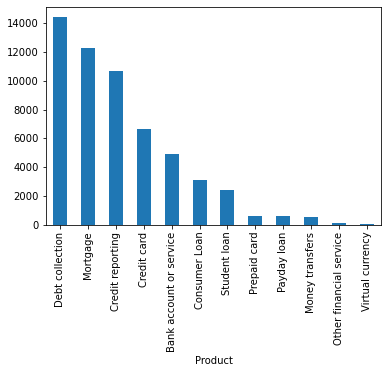

In [7]:
no_of_complaints.plot.bar()

In [11]:
consumer['Company'].unique()

array(['Equifax', 'Wells Fargo & Company', 'Citibank', ...,
       'Balekian Hayes, PLLC', 'ALE Solutions, Inc.',
       'National Loan Investors, LP'], dtype=object)

In [12]:
complaints=consumer.groupby(['Company'])['Complaint ID'].count().sort_values(ascending=False)
complaints.head(10)

Company
Bank of America                           34903
Wells Fargo & Company                     26490
JPMorgan Chase & Co.                      21677
Equifax                                   21489
Experian                                  20075
TransUnion Intermediate Holdings, Inc.    16881
Citibank                                  16792
Ocwen                                     13110
Capital One                               10082
Nationstar Mortgage                        8414
Name: Complaint ID, dtype: int64

In [13]:
source_medium=consumer['Submitted via'].value_counts()
print(source_medium)

Web            235462
Referral        68450
Phone           25802
Postal mail     23644
Fax              5264
Email             188
Name: Submitted via, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


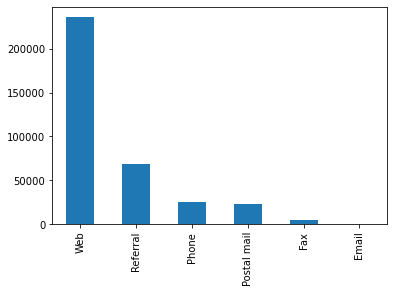

In [4]:
source_medium=consumer['Submitted via'].value_counts().plot.bar()
print(source_medium)

In [8]:
state_complaints=consumer.groupby(['State'])['Complaint ID'].count()
state_complaints.sort_values(ascending=False)

State
CA    52368
FL    34567
TX    26683
NY    24554
GA    15886
      ...  
MH       19
MP       13
AS        9
PW        8
AA        7
Name: Complaint ID, Length: 62, dtype: int64

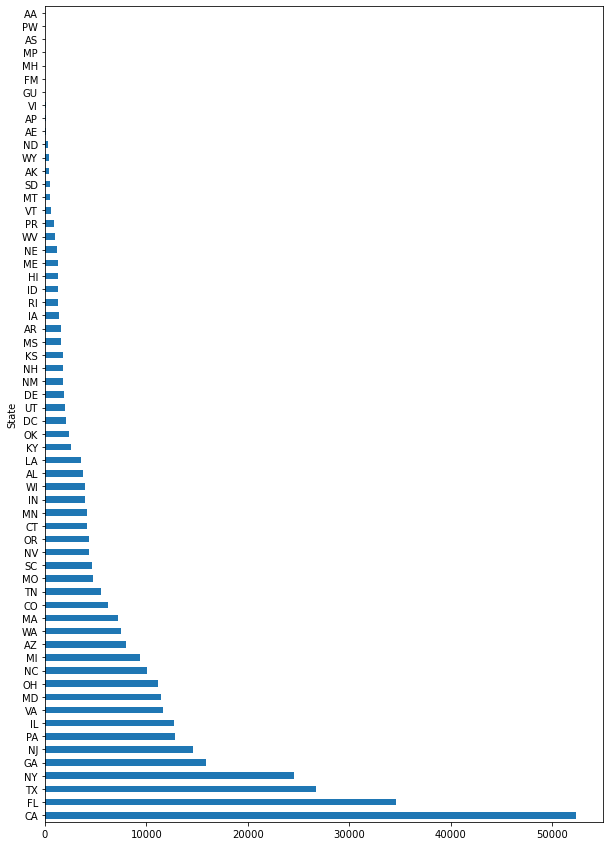

In [10]:
plt.figure(figsize=(10,15))
state_complaints.sort_values(ascending=False).plot.barh()

In [3]:
from datetime import datetime
df_train['Date']=pd.to_datetime(consumer['Date received'])
df_train['Year']=df_train['Date'].dt.year #extracting year
df_train['Month']=df_train['Date'].dt.month #extracting month
df_train["Year_Month"] = df_train.Year.astype(str).str.cat(df_train.Month.astype(str), sep='-')


In [4]:
df_train['Date']=pd.to_datetime(consumer['Date received'])
df_train['Year']=df_train['Date'].dt.year #extracting year
df_train['Month']=df_train['Date'].dt.month#extracting month
df_train['week']=df_train['Date'].dt.week
df_train['day']=df_train['Date'].dt.day
df_train['week_day']=df_train.week.astype(str).str.cat(df_train.day.astype(str),sep='-')

In [5]:
consumer['year_month']=df_train["Year_Month"] 
consumer['week_day']=df_train['week_day']

In [33]:
consumer.groupby(['year_month'])['Complaint ID'].count().sort_values(ascending=False).head()

year_month
2016-3    93
2015-9    88
2016-6    82
2015-7    81
2016-4    78
Name: Complaint ID, dtype: int64

In [23]:
consumer.groupby(['week_day'])['Complaint ID'].count().sort_values(ascending=False).head()

week_day
35-27    1304
37-10    1286
15-11    1273
11-14    1259
26-26    1258
Name: Complaint ID, dtype: int64

In [24]:
company_respond=consumer.groupby(['Company response to consumer'])['Company'].count().sort_values(ascending=False)
company_respond

Company response to consumer
Closed with explanation            265700
Closed with non-monetary relief     46085
Closed with monetary relief         24715
Closed without relief               10604
Closed                               8568
Closed with relief                   3138
Name: Company, dtype: int64

In [25]:
common_response =consumer.groupby(['Company public response'])['Company'].count().sort_values(ascending=False).head()
common_response

Company public response
Company chooses not to provide a public response                                                                           31526
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            19268
Company believes it acted appropriately as authorized by contract or law                                                   12055
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1091
Company believes the complaint is the result of a misunderstanding                                                          1075
Name: Company, dtype: int64

In [26]:
timely_manner=consumer.groupby(['Timely response?','Consumer disputed?'])['Consumer disputed?'].count()
print(timely_manner)

Timely response?  Consumer disputed?
No                No                      4906
                  Yes                     1229
Yes               No                    277732
                  Yes                    74943
Name: Consumer disputed?, dtype: int64


In [6]:
consumer.dropna(inplace=True)
consumer.reset_index().head()

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,...,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_month,week_day
0,109,2015-09-08,Debt collection,"Other (i.e. phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,Amshire Collections is attempting to collect a...,Company believes it acted appropriately as aut...,"Amsher Collection Services, Inc.",IN,...,Servicemember,Consent provided,Web,2015-09-08,Closed with explanation,Yes,No,1554834,2015-9,37-8
1,356,2016-07-07,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt is not mine,I WAS SUED BY EQUABLE ASCENT FINANCIAL LLC WHI...,Company can't verify or dispute the facts in t...,"Allgate Financial, LLC",MD,...,Servicemember,Consent provided,Web,2016-07-07,Closed with explanation,Yes,Yes,2003210,2016-7,27-7
2,597,2015-10-24,Debt collection,"Other (i.e. phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,I owe a bill XXXX from early cancellation of c...,Company believes it acted appropriately as aut...,"Valentine and Kebartas, Inc.",OH,...,Servicemember,Consent provided,Web,2015-10-28,Closed with explanation,Yes,Yes,1623434,2015-10,43-24
3,851,2015-11-16,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,Defendant gave debt to collection agency who c...,Company chooses not to provide a public response,SquareTwo Financial Corporation,FL,...,"Older American, Servicemember",Consent provided,Web,2015-11-16,Closed with explanation,Yes,Yes,1657784,2015-11,47-16
4,927,2016-01-29,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX XXXX continues to send this account to co...,Company believes it acted appropriately as aut...,"Pinnacle Credit Services, LLC",SC,...,Servicemember,Consent provided,Web,2016-02-03,Closed with explanation,Yes,No,1764007,2016-1,4-29


In [8]:
consumer.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
year_month                      0
week_day                        0
dtype: int64

In [8]:
# Load the required libraries for cleaning
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Create a function to generate cleaned data from raw text
def clean_text(consumer):
    consumer= word_tokenize(consumer) # Create tokens
    consumer= " ".join(consumer) # Join tokens
    consumer= re.sub('XXXX','',consumer) # Remove 'XXXX' text with blank
    consumer= [char for char in consumer if char not in string.punctuation] # Remove punctuations
    consumer= ''.join(consumer) # Join the leters
    consumer= [word for word in consumer.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
    return " ".join(consumer)

In [11]:
# Apply the function to 'text' to clean it
# Add cleaned data as a separate column to the DataFrame

consumer['cleaned_text']=consumer['Consumer complaint narrative'].apply(clean_text)
consumer['cleaned_text'].head(10)

109     Amshire Collections attempting collect fabrica...
356     SUED EQUABLE ASCENT FINANCIAL LLC RESULTED JUD...
597     owe bill early cancellation contract 100000 de...
851     Defendant gave debt collection agency could ve...
927     continues send account collections bill alread...
1597    auto Wells Fargo repossed XXXX late payments y...
1634    received letter multiple collection agency cal...
1646    wrote ECMC asking legal validation debt 30 day...
1782                         Keeps calling even told know
2124    paying credit card business although card pers...
Name: cleaned_text, dtype: object

In [12]:
X = consumer['cleaned_text'].values
y = consumer['Product'].values

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.3)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_idf, y_train)
pred_mnb = mnb.predict(X_test_idf)
acc = round(accuracy_score(y_test, pred_mnb),3)
print('Multinomial NB ',acc)

Multinomial NB  0.934


In [15]:
RF=RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train_idf, y_train)
pred_RF= RF.predict(X_test_idf)
acc = round(accuracy_score(y_test, pred_RF),3)
print('Random Forest ',acc)

Random Forest  0.937


In [ ]:
###Here we can see by comparing two algorithm's Random Forest model and Multinomial Naive Bayes model accuracy doesnot have much differences

In [16]:
consumer['Date received']=pd.to_datetime(consumer['Date received'])
consumer['Date sent to company']=pd.to_datetime(consumer['Date sent to company'])
consumer['Sub-product'].fillna('Not Provided',inplace=True)
consumer['Sub-issue'].fillna('Not Provided',inplace=True)
consumer['Issue'].fillna('Others',inplace=True)
consumer['Sub-issue'].fillna('Not known',inplace=True)
consumer['Consumer complaint narrative'].fillna('Not Provided',inplace=True)
consumer['Company public response'].fillna('consent not provided',inplace=True)
consumer['State'].fillna('Others',inplace=True)
consumer['ZIP code'].fillna('Not Provided',inplace=True)
consumer['Submitted via'].fillna('Others',inplace=True)
consumer['Tags'].fillna('Not known',inplace=True)
consumer['Consumer consent provided?'].fillna('consent not provided',inplace=True)
consumer['Consumer consent provided?']=consumer['Consumer consent provided?'].apply(lambda x:
                                                                                    'Consumer consent provided?' if x=='other' or x=='Consent withdrawn' else x
                                                                                    )

# Feature Engineering

In [17]:
consumer['Date sent to company'] =pd.to_datetime(consumer['Date sent to company'])
consumer['Date sent to company'].head()

109   2015-09-08
356   2016-07-07
597   2015-10-28
851   2015-11-16
927   2016-02-03
Name: Date sent to company, dtype: datetime64[ns]

In [18]:
consumer['week_year']=consumer['Date sent to company'].dt.week
consumer['week_year'].head()

109    37
356    27
597    44
851    47
927     5
Name: week_year, dtype: int64

In [19]:
consumer['year']=consumer['Date sent to company'].dt.year
consumer['year'].head()

109    2015
356    2016
597    2015
851    2015
927    2016
Name: year, dtype: int64

In [20]:
consumer['month']=consumer['Date sent to company'].dt.month
consumer['month'].head()

109     9
356     7
597    10
851    11
927     2
Name: month, dtype: int64

In [21]:
np.sort(consumer['week_year'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [22]:
consumer_trend= consumer[((consumer.year ==2016) & (consumer.week_year <=26)) | ((consumer.year ==2015) & (consumer.week_year >=28))]
consumer_trend.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_month,week_day,cleaned_text,week_year,year,month
109,2015-09-08,Debt collection,"Other (i.e. phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,Amshire Collections is attempting to collect a...,Company believes it acted appropriately as aut...,"Amsher Collection Services, Inc.",IN,479XX,...,Closed with explanation,Yes,No,1554834,2015-9,37-8,Amshire Collections attempting collect fabrica...,37,2015,9
597,2015-10-24,Debt collection,"Other (i.e. phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,I owe a bill XXXX from early cancellation of c...,Company believes it acted appropriately as aut...,"Valentine and Kebartas, Inc.",OH,446XX,...,Closed with explanation,Yes,Yes,1623434,2015-10,43-24,owe bill early cancellation contract 100000 de...,44,2015,10


In [23]:
consumer.groupby(['month'])['Consumer complaint narrative'].count().sort_values(ascending=False).head()

month
4    147
6    137
3    137
5    133
7    123
Name: Consumer complaint narrative, dtype: int64

In [24]:
consumer.groupby(['week_year'])['Consumer complaint narrative'].count().sort_values(ascending=False).head()

week_year
13    47
21    41
16    39
17    36
15    35
Name: Consumer complaint narrative, dtype: int64

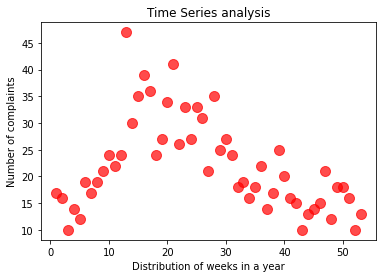

In [25]:
plt.scatter(consumer['week_year'].value_counts().keys(),consumer['week_year'].value_counts(), c='r', s=100, alpha=0.7)
plt.xlabel('Distribution of weeks in a year')
plt.ylabel('Number of complaints')
plt.title('Time Series analysis')
plt.show()

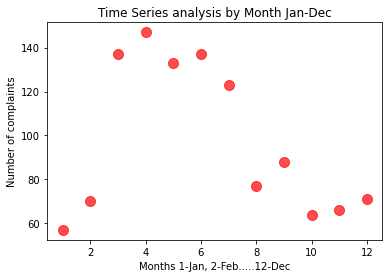

In [26]:
plt.scatter(consumer.month.value_counts().keys(),consumer.month.value_counts(), c='r', s=100, alpha=0.7)
plt.xlabel('Months 1-Jan, 2-Feb.....12-Dec')
plt.ylabel('Number of complaints')
plt.title('Time Series analysis by Month Jan-Dec')
plt.show()

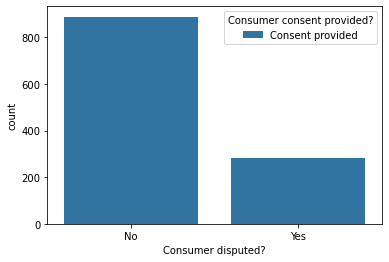

In [27]:
sns.countplot(x='Consumer disputed?',data=consumer,hue='Consumer consent provided?')

In [5]:
##now we will make our prediction model
train=pd.read_csv('Edureka_Consumer_Complaints_train.csv')
test=pd.read_csv('Edureka_Consumer_Complaints_test.csv')

In [6]:
train['Date received']=pd.to_datetime(train['Date received'])
train['Date sent to company']=pd.to_datetime(train['Date sent to company'])
train['Sub-product'].fillna('Not Provided',inplace=True)
train['Sub-issue'].fillna('Not Provided',inplace=True)
train['Issue'].fillna('Others',inplace=True)
train['Sub-issue'].fillna('Not known',inplace=True)
train['Consumer complaint narrative'].fillna('Not Provided',inplace=True)
train['Company public response'].fillna('consent not provided',inplace=True)
train['State'].fillna('Others',inplace=True)
train['ZIP code'].fillna('Not Provided',inplace=True)
train['Submitted via'].fillna('Others',inplace=True)
train['Tags'].fillna('Not known',inplace=True)
train['Consumer consent provided?'].fillna('consent not provided',inplace=True)
train['Consumer consent provided?']=train['Consumer consent provided?'].apply(lambda x:
                                                                                    'Consumer consent provided?' if x=='other' or x=='Consent withdrawn' else x
                                                                                    )

In [7]:
test['Date received']=pd.to_datetime(test['Date received'])
test['Date sent to company']=pd.to_datetime(test['Date sent to company'])
test['Sub-product'].fillna('Not Provided',inplace=True)
test['Sub-issue'].fillna('Not Provided',inplace=True)
test['Issue'].fillna('Others',inplace=True)
test['Sub-issue'].fillna('Not known',inplace=True)
test['Consumer complaint narrative'].fillna('Not Provided',inplace=True)
test['Company public response'].fillna('consent not provided',inplace=True)
test['State'].fillna('Others',inplace=True)
test['ZIP code'].fillna('Not Provided',inplace=True)
test['Submitted via'].fillna('Others',inplace=True)
test['Tags'].fillna('Not known',inplace=True)
test['Consumer consent provided?'].fillna('consent not provided',inplace=True)
test['Consumer consent provided?']=test['Consumer consent provided?'].apply(lambda x:
                                                                                    'Consumer consent provided?' if x=='other' or x=='Consent withdrawn' else x
                                                                                    )

In [8]:
train['Date sent to company'] =pd.to_datetime(train['Date sent to company'])
train['week_year']=train['Date sent to company'].dt.week
train['year']=train['Date sent to company'].dt.year
train['month']=train['Date sent to company'].dt.month

In [9]:
test['Date sent to company'] =pd.to_datetime(test['Date sent to company'])
test['week_year']=test['Date sent to company'].dt.week
test['year']=test['Date sent to company'].dt.year
test['month']=test['Date sent to company'].dt.month

In [10]:
train.drop(['Date received','Consumer complaint narrative','ZIP code','Date sent to company','Complaint ID'],axis=1,inplace=True)
train.head(2)

,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,week_year,year,month
0,Credit reporting,Not Provided,Incorrect information on credit report,Information is not mine,consent not provided,Equifax,GA,Not known,Consent not provided,Web,Closed with explanation,Yes,No,42,2015,10
1,Bank account or service,Other bank product/service,Deposits and withdrawals,Not Provided,consent not provided,Wells Fargo & Company,GA,Not known,Consent provided,Web,Closed with explanation,Yes,Yes,17,2015,4


In [11]:
test.drop(['Date received','Consumer complaint narrative','ZIP code','Date sent to company','Complaint ID'],axis=1,inplace=True)
test.head(2)

,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,week_year,year,month
0,Credit card,Not Provided,Customer service / Customer relations,Not Provided,consent not provided,Citibank,TX,Not known,consent not provided,Web,Closed with monetary relief,Yes,3,2015,1
1,Consumer Loan,Title loan,Payment to acct not credited,Not Provided,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,Servicemember,consent not provided,Phone,Closed with explanation,Yes,25,2016,6


In [12]:
lb=LabelEncoder()
label_df=train.apply(lb.fit_transform)
label_df.head()

,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,week_year,year,month
0,3,29,52,32,10,998,15,0,0,5,1,1,0,41,4,9
1,0,31,39,37,10,2986,15,0,1,5,1,1,1,16,4,3
2,2,29,68,37,10,623,51,0,4,2,3,1,0,0,3,0
3,4,30,40,39,9,1031,43,0,4,4,1,1,0,8,5,2
4,4,24,40,39,10,1320,8,0,4,5,1,1,1,4,4,0


In [13]:
x=label_df[['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'Company', 'State', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Company response to consumer', 'Timely response?']]
y=label_df['Consumer disputed?']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [15]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [17]:
model0=dtc.fit(x_train,y_train)

In [19]:
y_pred0=model0.predict(x_test)
acc_score0=round(accuracy_score(y_pred0,y_test),3)
print(acc_score0)

0.717


In [20]:
clf= RandomForestClassifier(random_state=0,n_estimators=100)

In [21]:
model=clf.fit(x_train,y_train)

In [22]:
y_pred=model.predict(x_test)
acc_score=round(accuracy_score(y_pred,y_test),3)
print(acc_score)

0.752


In [23]:
abc=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=0) ## n_estimators is the no. od models to iteratively train

In [24]:
model1=abc.fit(x_train,y_train)

In [25]:
y_pred1=model1.predict(x_test)
acc_score1=round(accuracy_score(y_pred1,y_test),3)
print(acc_score)

0.752


In [27]:
lb=LabelEncoder()
label_test_df=test.apply(lb.fit_transform)
label_test_df.head()

,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,week_year,year,month
0,2,29,35,37,10,457,54,0,4,5,2,1,2,4,0
1,1,42,72,37,4,1168,54,3,4,2,1,1,24,5,5
2,2,29,31,37,10,399,35,0,1,5,1,1,35,4,8
3,1,22,76,37,10,1533,31,0,1,5,3,1,19,5,4
4,4,30,49,17,9,910,51,0,1,5,1,1,26,5,6


In [28]:
label_test_df.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'Company', 'State', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'week_year', 'year',
       'month'],
      dtype='object')

In [30]:
x_test=label_test_df[['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'Company', 'State', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Company response to consumer', 'Timely response?']]

In [29]:
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(x,y)
y1_pred = rfc1.predict(x_test)

In [35]:
submission = pd.DataFrame(data=y1_pred, index=None)
submission.replace(to_replace=0, value='No', inplace=True)
submission.replace(to_replace=1, value='Yes', inplace=True)
#Print the output DataFrame
print(submission)
submission.to_csv(f"submission_merged.csv",index=False)

        0
0      No
1      No
2      No
3      No
4      No
...    ..
71757  No
71758  No
71759  No
71760  No
71761  No

[71762 rows x 1 columns]
